In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet

In [13]:
df= pd.read_csv('../data/datacar_cleaned.csv')
print(df.head)

<bound method NDFrame.head of       year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2014         450000     145500     1            1             1      0   
1     2014         370000     120000     1            1             1      2   
2     2006         158000     140000     3            1             1      4   
3     2010         225000     127000     1            1             1      0   
4     2007         130000     120000     3            1             1      0   
...    ...            ...        ...   ...          ...           ...    ...   
8123  2013         320000     110000     3            1             1      0   
8124  2007         135000     119000     1            1             1      1   
8125  2009         382000     120000     1            1             1      0   
8126  2013         290000      25000     1            1             1      0   
8127  2013         290000      25000     1            1             1      0   

      mil

In [14]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
net= ElasticNet()
net.fit(X_train, y_train)

ElasticNet()

In [17]:
y_pred = net.predict(X_test)

In [18]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
root_mse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {root_mse}")


Mean Squared Error: 219804077963.9374
Mean Absolute Error: 273265.91041931626
R2 Score: 0.6646692668582048
Root Mean Squared Error: 468832.675870547


In [19]:
#saving to csv
evalation = []
model =  "ElasticNet Regressiongit"
evalation.append({
    'model': model, 
    'MAE': mae,
    'MSE' : mse,
    'r2score' : r2,
    'Root MSE' : root_mse
})
# Creating a DataFrame to display the evaluation metrics
ev_df = pd.DataFrame(evalation)
print(ev_df)
ev_df.to_csv('../data/evaluation.csv', mode='a', header=False, index=False)

                      model            MAE           MSE   r2score  \
0  ElasticNet Regressiongit  273265.910419  2.198041e+11  0.664669   

        Root MSE  
0  468832.675871  


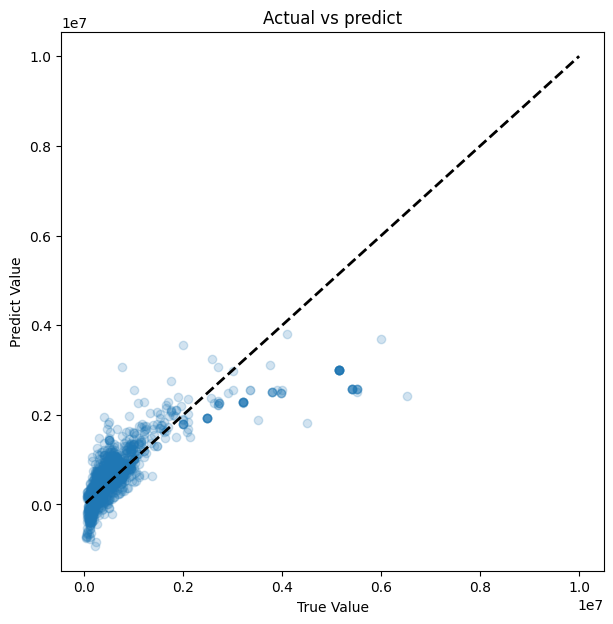

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred,alpha=0.2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("True Value")
plt.ylabel("Predict Value")
plt.title("Actual vs predict")
plt.show()